## Import requirements

In [1]:
# requirements:

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## The required class

1. BanditMachine
2. EpsilonGreedy
3. UCB


In [2]:
# class BanditMachine:

class BanditMachine:
    def __init__(self, n_arms):
        self.n_arms = n_arms  # number of arms
        
        self.sigma = 2  # reward distribution's standard deviation
        self.miu_list = np.random.normal(0, self.sigma, n_arms)  # initialize the mean of each arm's reward
        self.counts = np.zeros(n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(n_arms)  # record the estimated value of each arm
        
    def update(self, arm, reward):
        """
        update the arm's information
        :param arm: int, index of the arm
        :param reward: float, reward
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward # incremental update of the estimated value

    def play(self, arm):
        """
        play the arm and get the reward
        :param arm: int, index of the arm
        :return: float, reward
        """
        if arm < 0 or arm >= self.n_arms:
            raise ValueError("Arm index is out of range.")
        
        # generate the reward
        reward = np.random.normal(self.miu_list[arm], self.sigma)
        # update the arm's information
        self.update(arm, reward)
        return reward


In [3]:
# class EpsilonGreedy:

class EpsilonGreedy:
    def __init__(self, machines, epsilon):
        """
        :param machines: BanditMachine, multi-armed bandit machine object
        :param epsilon: float, probability of randomly selecting an arm
        """
        self.machines = machines
        self.epsilon = epsilon
        self.arms = machines.miu_list
        self.n_arms = len(self.arms)
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0  # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        # with probability epsilon, randomly select an arm, otherwise select the arm with the highest estimated value
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


In [4]:
class UCB:
    def __init__(self, machines, c):
        """
        :param arms: list, each element is the mean of the reward distribution of an arm
        :param c: float, a constant that controls the degree of exploration
        """
        self.machines = machines
        self.c = c 
        self.arms = machines.miu_list # the list of arms
        self.n_arms = len(self.arms) # number of arms
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0 # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i
        
        
        # return the arm with the highest UCB value
        ucb_values = self.values + self.c * np.sqrt(np.log(self.total_counts) / (self.counts + 1))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


## Test bandit base

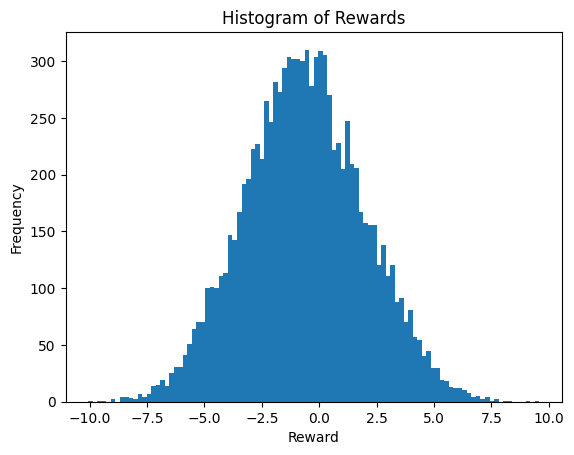

Average Reward: -0.6478836855660293


In [5]:
# initialize a bandit machine with 10 arms
arm = BanditMachine(10)

rewards = []
for arm_i in range(10):
    for _ in range(1000):
        reward = arm.play(arm_i)
        rewards.append(reward)

average_reward = np.mean(rewards)


plt.hist(rewards, bins=100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
plt.show()

print("Average Reward:", average_reward)


## Test Epsilon Greedy

In [6]:
# initialize a bandit machine with 10 arms
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -4.072341509892371
arm:  1 miu:  3.329601598435934
arm:  2 miu:  1.0508798630172629
arm:  3 miu:  -0.4498336050683393
arm:  4 miu:  -0.8700114566445604
arm:  5 miu:  0.3946544033858839
arm:  6 miu:  -0.07215046978394993
arm:  7 miu:  -1.7994763570549859
arm:  8 miu:  3.4101658082503588
arm:  9 miu:  -0.7036550263326332


In [7]:
bandits.miu_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
# bandits.miu_list = [-1, 1]

for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -1
arm:  1 miu:  -1
arm:  2 miu:  -1
arm:  3 miu:  -1
arm:  4 miu:  -1
arm:  5 miu:  -1
arm:  6 miu:  -1
arm:  7 miu:  -1
arm:  8 miu:  -1
arm:  9 miu:  1


chosen_arm:  0 reward:  1.7323378358510055
chosen_arm:  1 reward:  -1.3803562858045866
chosen_arm:  2 reward:  -0.44801167855127433
chosen_arm:  3 reward:  -1.6559171956147245
chosen_arm:  4 reward:  3.085598790962117
chosen_arm:  5 reward:  -5.800910571144615
chosen_arm:  6 reward:  2.4331599244758753
chosen_arm:  7 reward:  -3.413540936333823
chosen_arm:  8 reward:  0.03287073830339948
chosen_arm:  9 reward:  -0.6662989388715654
chosen_arm:  4 reward:  -3.865467746191573
chosen_arm:  6 reward:  -1.7629131553736852
chosen_arm:  0 reward:  1.7140588279614701
chosen_arm:  0 reward:  -1.6817636433747376
chosen_arm:  9 reward:  1.417413063460448
chosen_arm:  0 reward:  0.03346349201686527
chosen_arm:  0 reward:  2.1126202247020065
chosen_arm:  0 reward:  -2.566404009624771
chosen_arm:  9 reward:  2.4995480223105977
chosen_arm:  9 reward:  0.6291883987585072
chosen_arm:  9 reward:  0.6427559528329725
chosen_arm:  9 reward:  0.14845393758713155
chosen_arm:  9 reward:  0.526606283295229
chos

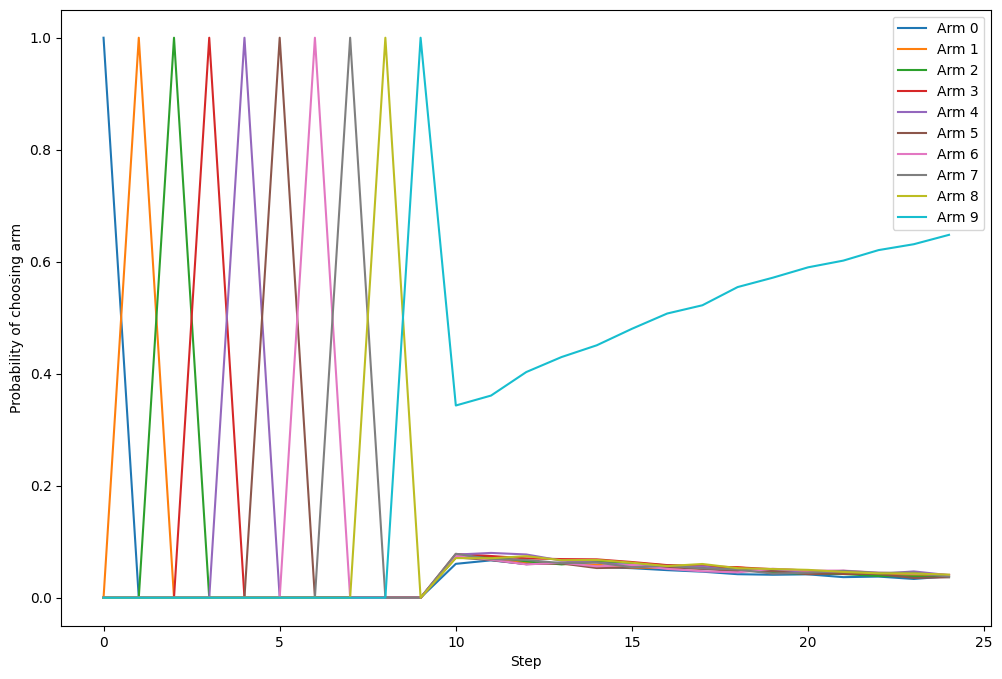

In [8]:
# initial Episilon-greedy agent
e = 0.1
e_greedy_bandits = EpsilonGreedy(bandits, e)

# play 25 times
for _ in range(25):
    chosen_arm, reward = e_greedy_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

e = 0.0
# e_greedy_bandits = EpsilonGreedy(bandits, e)

# initialize numbers of rounds
total_rounds = 4000

# initialize the number of steps
total_steps = 25

# record the number of times each arm is pulled at each step
arm_counts = np.zeros((total_steps, bandits.n_arms))

# run Epsilon-Greedy for multiple rounds
for _ in range(total_rounds):
    e_greedy_bandits = EpsilonGreedy(bandits, e)  # initialize the Epsilon-Greedy agent for each round
    for step in range(total_steps):
        chosen_arm, _ = e_greedy_bandits.play()
        arm_counts[step, chosen_arm] += 1

# transform the counts into probabilities
arm_probabilities = arm_counts / total_rounds

# output the probabilities of selecting each arm at the 11th step
step = 10  # the index of the step
print(f"Probabilities of selecting each arm at step {step + 1}:")
for arm in range(bandits.n_arms):
    print(f"Arm {arm}: {arm_probabilities[step, arm]}")

# draw the probabilities of selecting each arm at each step
plt.figure(figsize=(12, 8))
for arm in range(bandits.n_arms):
    plt.plot(arm_probabilities[:, arm], label=f'Arm {arm}')
plt.xlabel('Step')
plt.ylabel('Probability of choosing arm')
plt.legend()
plt.show()

## Test UCB

In [9]:
# initial bandit machine
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -2.432067804186786
arm:  1 miu:  0.11300946615900753
arm:  2 miu:  3.4897890566284437
arm:  3 miu:  -1.9061709811433718
arm:  4 miu:  -0.3422712414629146
arm:  5 miu:  1.1112686869217996
arm:  6 miu:  -0.5528089679570974
arm:  7 miu:  -1.4107642701619159
arm:  8 miu:  -0.4994928116425138
arm:  9 miu:  3.0209002983619135


In [10]:
# initial UCB agent
c = 1.5
ucb_bandits = UCB(bandits, c)

# play 25 times using UCB
for _ in range(25):
    chosen_arm, reward = ucb_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

chosen_arm:  0 reward:  -4.085106024325163
chosen_arm:  1 reward:  2.772969354985954
chosen_arm:  2 reward:  6.831696540774642
chosen_arm:  3 reward:  -1.102297628686828
chosen_arm:  4 reward:  -0.5930950530401453
chosen_arm:  5 reward:  2.8629751965956283
chosen_arm:  6 reward:  -0.5470409844214192
chosen_arm:  7 reward:  -4.7140580610587435
chosen_arm:  8 reward:  -3.721366773035387
chosen_arm:  9 reward:  3.841954449679322
chosen_arm:  2 reward:  4.28587636364682
chosen_arm:  2 reward:  2.044714135554635
chosen_arm:  2 reward:  1.9177513838656843
chosen_arm:  9 reward:  6.3596312596614215
chosen_arm:  9 reward:  1.9850367980893906
chosen_arm:  9 reward:  5.712916704908461
chosen_arm:  9 reward:  5.813555245432225
chosen_arm:  9 reward:  -0.24704650053145238
chosen_arm:  2 reward:  3.339011142012188
chosen_arm:  9 reward:  1.767238578440355
chosen_arm:  2 reward:  1.9263577649739883
chosen_arm:  5 reward:  3.4609758130599033
chosen_arm:  5 reward:  0.5728739087157934
chosen_arm:  1 r

## Visualization

In [11]:
# initialize BanditMachine with 10 arms
bandit = BanditMachine(10)

eps_01 = EpsilonGreedy(bandit,0.1)
eps_00 = EpsilonGreedy(bandit,0)
eps_001 = EpsilonGreedy(bandit,0.01)
ucb_2 = UCB(bandit,2)
ucb_1 = UCB(bandit,1)
ucb_05 = UCB(bandit,0.5)
optimal = np.argmax(bandit.miu_list)
step = 1000
runs = 2000

# define the function to test the algorithm
def test_algo(algo,runs,step):
    Q_runs_lst = [[] for m in range(runs)]
    Q_runs_lst_average = [0 for n in range(step)]
    # 2d list, store the best action judgement variable of all runs of all steps, 1 is the correct action, 0 is not the best action
    action_runs_lst = [[] for k in range(runs)]  

    action_runs_lst_average = [0 for j in range(step)]  # record the average best action rate of each step by all runs
    for run_times in range(0, runs):
        k=1
        algo.counts = np.zeros(algo.n_arms, dtype=int)
        algo.values = np.zeros(algo.n_arms, dtype=float)
        algo.total_counts = 0
        while k<=step:
            reward=algo.play()[1]
            action=algo.play()[0]
            Q_runs_lst[run_times].append(reward)
            sum_best_action = 0
            if action==optimal:
                sum_best_action +=1
            action_runs_lst[run_times].append(sum_best_action)
            k += 1
    for i in range(0, step):
        for j in range(0, runs):
            Q_runs_lst_average[i] = Q_runs_lst_average[i] + Q_runs_lst[j][i]
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        Q_runs_lst_average[i] = Q_runs_lst_average[i] / runs
        action_runs_lst_average[i] = action_runs_lst_average[i] / runs
    return Q_runs_lst_average,action_runs_lst_average


In [12]:
# run the algorithm and get the average reward and best action rate of each step
eps_01_reward,eps_01_rate = test_algo(eps_01,runs,step)
eps_00_reward,eps_00_rate = test_algo(eps_00,runs,step)
eps_001_reward,eps_001_rate = test_algo(eps_001,runs,step)
ucb_1_reward,ucb_1_rate = test_algo(ucb_1,runs,step)
ucb_05_reward,ucb_05_rate = test_algo(ucb_05,runs,step)
ucb_2_reward,ucb_2_rate = test_algo(ucb_2,runs,step)


In [ ]:
# plot the average reward and best action rate of each step
plt.figure(1,figsize=(15,6))

# set the format of the y-axis as a percentage
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

x = range(step)
plt.plot(x,ucb_2_reward,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,eps_01_reward,linewidth=0.5,label="epsilon_greedy,epsilon=0.1")
plt.plot(x,eps_001_reward,linewidth=0.5,color='g',label="epsilon_greedy,epsilon=0.01")
plt.plot(x,eps_00_reward,linewidth=0.5,color='orange',label="epsilon_greedy,epsilon=0")
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend(loc="best")
plt.figure(2,figsize=(15,6))
plt.plot(x,ucb_2_rate,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,eps_01_rate,linewidth=0.5,label="epsilon_greedy,epsilon=0.1")
plt.plot(x,eps_001_rate,linewidth=0.5,color='g',label="epsilon_greedy,epsilon=0.01")
plt.plot(x,eps_00_rate,linewidth=0.5,color='orange',label="epsilon_greedy,epsilon=0")
plt.xlabel('steps')
plt.ylabel('%Optimalaction')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend(loc="best")
plt.figure(3,figsize=(15,6))
plt.plot(x,ucb_1_reward,linewidth=0.5,label="ucb,c=1")
plt.plot(x,ucb_2_reward,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,ucb_05_reward,linewidth=0.5,color='g',label="ucb,c=0.5")
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend(loc="best")
plt.figure(4,figsize=(15,6))
plt.plot(x,ucb_1_rate,linewidth=0.5,label="ucb,c=1")
plt.plot(x,ucb_2_rate,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,ucb_05_rate,linewidth=0.5,color='g',label="ucb,c=0.5")
plt.xlabel('steps')
plt.ylabel('%Optimalaction')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend(loc="best")
plt.show()